In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
%matplotlib inline

## Lecture 18 Time series analysis 2, Time Domain Decomposition

### Review of Lecture 17

- learn basic concepts of data types
- properties of typical time series
- the concept of time domain, frequency domain, spectrum and power spectrum
- use Python to generate periodograms, power spectrum density
- interpret your periodograms

### In this lecture we will:

- Concepts: learn internal structures of time series data
- Python tricks: decompose a time series using Python
    - rolling() (moving/running average) using Pandas
    - seasonal_decompose() using tsa

### 1. Internal structures of a time series

Typical Characteristics of time series data that requires its special mathematical treatment:

- General trend
- Seasonality
- Cyclical movements
- Unexpected (random) variations

Most time series has of one or more of the aforementioned internal structures. Based on this notion, a time series can be expressed as xt = ft + st + ct + et, which is a sum of the trend, seasonal, cyclical, and irregular components in that order. Here, t is the time index at which observations about the series have been taken at t = 1,2,3 ...N successive and equally spaced points in time.

As you have learned from last lecture, one objective of time series analysis is to understand the frequency properties (spectrum and power spectrum, aka periodogram), which goes from time domain to frequency domain. SciPy provides a bunch of nice tools for doing the frequency analysis.

Another **objective** of time series analysis is to decompose a time series into its constituent characteristics and develop mathematical models for each. This is related to the frequency domain analysis but all results are shown in the time domain - the frequency analysis is under the hood (you don't need to worry about the frequency analysis, but you need to know what it is). These models are then used to understand what causes the observed behavior of the time series and to predict the series for future points in time. 

#### a. General trend

When a time series exhibits an upward or downward movement in the long run, it is said to have a general trend. 

#### b. Seasonality

Seasonality manifests as repetitive and period variations in a time series.

#### c. Cyclic behavior

Cyclical changes are movements observed after every few units of time, but they occur less frequently than seasonal fluctuations. **Unlike seasonality, cyclical changes might not have a fixed period of variations.**

#### d. Random variations

Referring to our model that expresses a time series as a sum of four components, it is noteworthy that in spite of being able to account for the three other components, we might still be left with an irreducible error component that is random and does not exhibit systematic dependency on the time index. This fourth component reflects unexpected variations in the time series. Unexpected variations are stochastic and cannot be framed in a mathematical model for a definitive future prediction. This type of error is due to lack of information about explanatory variables that can model these variations or due to presence of a random noise.

### 2. Decompose a time series using Python

The objective of time series decomposition is to model the long-term trend and seasonality and estimate the overall time series as a combination of them. Two popular models for time series decomposition are

#### Additive model

The additive model formulates the original time series ($y(t)$) as the sum of the trend ($T(t)$) and seasonal ($S(t)$) components as follows:

$$y(t) = T(t) + S(t) + R(t)$$

where $R(t)$ is the "residual" of the time series obtained after subtracting the trend and seasonal components from the original time series. This "residual" part usually include random and/or cyclic changes, and the analysis of $R(t)$ is problem-dependent. The additive model is usually applied when there is a time-dependent trend cycle component, but independent seasonality that does not change over time.

#### Multiplicative model

The multiplicative decomposition model, which gives the time series as product of the trend, seasonal, and irregular components is useful when there is time-varying seasonality:

$$y(t) = T(t) \times S(t) \times R(t)$$

By taking logarithm, the multiplicative model is converted to an additive model of logarithm of the individual components. The multiplicative model is expressed as follows:

$$\log y(t) = \log T(t) + \log S(t) + \log R(t)$$

In the following part, we will discuss the following two popular methods for estimating the trend and seasonal components:

- Trend modeling using Moving Averages (**pandas**)
- Seasonal and Trend Decomposition using the Python package (**statsmodels.tsa**)

Let's think about how to decompose the following time series of monthly $CO_2$ concentration data

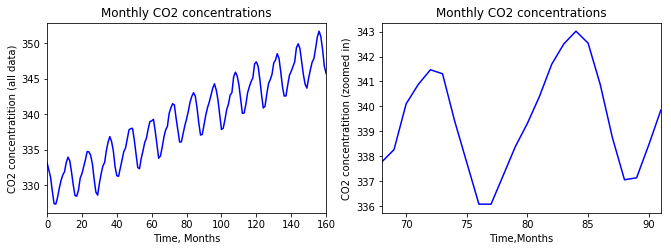

In [2]:
data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx')

plt.figure(figsize=(5.5*2, 3.5))
plt.subplot(1,2,1)
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time, Months')
plt.ylabel('CO2 concentratition (all data)')

plt.subplot(1,2,2)
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time,Months')
plt.ylabel('CO2 concentratition (zoomed in)')

plt.show()

data.to_excel('Monthly_CO2_Concentrations.xlsx')

We have passed the argument **converters** to the **read_excel** function in order to make sure that columns Year and Month are assigned the _integer_ (np.int32) datatype. 

## HW, use linear regression analysis to decompose the CO2 data.

#### a. Model the Trend using Moving Averages

Moving averages (MA) at a time index $t$ estimates the average trend cycle component $T(t)$ and is calculated by taking average of over the time period of $t \pm k$ where $k$ is the range of the MA:

$$T(t)^{(k)} = \frac{1}{2k+1}[y(t-k)+y(t-k+1)+...+y(t+k-1)+y(t+k)]$$

For example, a Moving average for k = 3 is

$$T(t)^{(3)} = \frac{1}{7}[y(t-3)+y(t-2)+y(t-1)+y(t)+y(t+1)+y(t+2)+y(t+3)]$$

Taking moving averages have an effect of smoothing the original time series by eliminating random noise. Commonly the total number of observations m = 2k + 1 is used to describe the moving average as m-order MA, which henceforth will be denoted as  $T(t)^{(k)}$

In Pandas, you can use the **rolling()** function to compute a moving average in a very straightforward way 

- Addictive Method

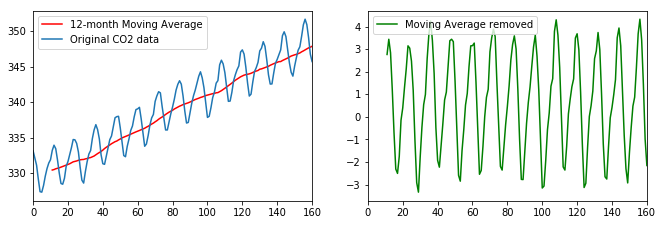

In [3]:
data['CO2M']=data['CO2'].rolling(12).mean()

plt.figure(figsize=(5.5*2, 3.5))
plt.subplot(1,2,1)
data['CO2M'].plot(color='r',label='12-month Moving Average')
data['CO2'].plot(label='Original CO2 data')
plt.legend()

plt.subplot(1,2,2)
(data.CO2-data['CO2M']).plot(color='g',label='Moving Average removed')
plt.legend()

The Multiplicative Model:

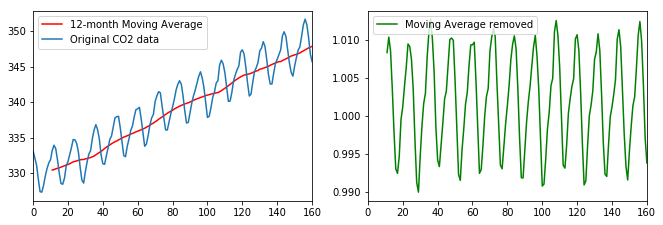

In [4]:
data['CO2M']=data['CO2'].rolling(12).mean()

plt.figure(figsize=(5.5*2, 3.5))
plt.subplot(1,2,1)
data['CO2M'].plot(color='r',label='12-month Moving Average')
data['CO2'].plot(label='Original CO2 data')
plt.legend()

plt.subplot(1,2,2)
(data.CO2/data['CO2M']).plot(color='g',label='Moving Average removed')
plt.legend()

The moving average window determines how much the trend is calculated. Here it is 12-months which gives basically a yearly average by subtracting an average of the year.

The mathematic principle behind moving average:

#### b. statsmodels.tsa


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx')

result = seasonal_decompose(data.CO2.tolist(), freq=12,model='additive')

print(type(result.trend))
#print(result.seasonal)
#print(result.resid)
#print(result.observed)

<class 'numpy.ndarray'>


The argument **freq** in the seasonal.seasonal_decompose is the periodicity of the seasonal behavior and the original time series being monthly observations we suspect a periodicity of 12 (why?).

Now the variable "result" is an objecto of the tsa.seasonal.DecomposeResult class, which contains four arrays:

- _result.trend_:    the **trend** component
- _result.seasonal_: the **seasonal** variations
- _result.resid_:    the **residual** component by removing trend and seasonal, basically "random + cyclic"
- _result.observed_: the **original data**

each of the above variables are NumPy arrays:

In [6]:
print(type(result.trend))

<class 'numpy.ndarray'>


which means you can plot them using the plt functions such as:

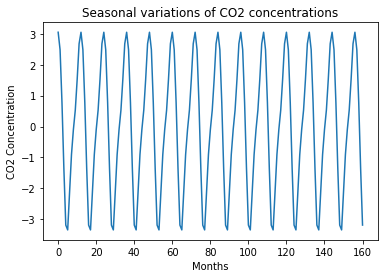

In [46]:
plt.plot(result.seasonal)
plt.xlabel('Months')
plt.ylabel('CO2 Concentration')
plt.title('Seasonal variations of CO2 concentrations')
plt.show()

if you do simply **result.plot()**, you should be able to get all the plots at the same time. **Note**: Pay attention to the x-axis, in this case it's the data sampling cadence which is in months: "Time = 100" means 100 months from the beginning of the data set.

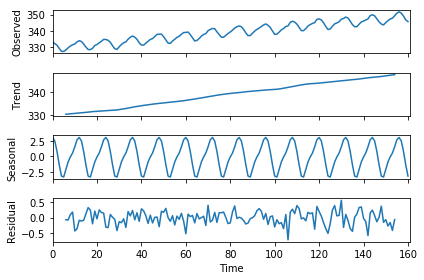

In [47]:
result.plot()
plt.show()

Isn't that cool?

Here's the NumPy method for doing MA using a for-loop

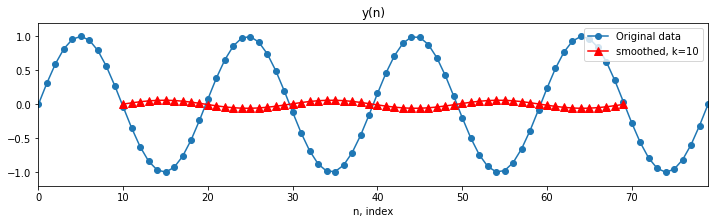

In [45]:
import numpy as np

t = np.linspace(0,4,80) # time
y = np.sin(t*np.pi*2) # y(t)

plt.figure(figsize=(12,3))
plt.plot(y,'-o',label='Original data') #plot the original data
plt.xlabel('n, index')
plt.title('y(n)')

y_smoothed = y*0+np.nan # initialize a new array by setting
                        # everything to nan
window = 10 # MA window

for i in range(window,len(t)-window): # loop over i-k to i+k
    y_smoothed[i]=np.mean(y[i-window:i+window+1])
    
# plot the results
plt.plot(y_smoothed,'-r^',markersize=8,label='smoothed, k=10')
plt.xlabel('n, index')
plt.title('y(n)')
plt.xlim([0,79])
plt.ylim([-1.2,1.2])
plt.legend()
plt.show()